In [1]:
import torch
import lightning.pytorch as pl
from lightning.pytorch.callbacks import RichProgressBar
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.utilities import CombinedLoader

from torch_geometric.loader import DataLoader
from torch_geometric.datasets import GNNBenchmarkDataset
from torch_geometric import seed_everything

from data import TaskManager
from GAN import GraphGAN
from GCN import GCNClassifier
seed_everything(42)

In [2]:
DATA_PATH = '/gpfs/gibbs/pi/gerstein/cz357/23fall/231007_fgcl/cifar10/'
dataset = GNNBenchmarkDataset(DATA_PATH, 'CIFAR10')

In [3]:
task_manager = TaskManager(dataset)

In [4]:
train_loader, val_loader, test_loader = task_manager.generate_dataloaders(task_id=0)

In [5]:
# MODEL_PATH = '/gpfs/gibbs/pi/gerstein/cz357/23fall/fgcl_ckpts/gcl_ckpts/gan_cifar10/'
MODEL_PATH = '/vast/palmer/scratch/gerstein/cz357/Untitled Folder/gan_test/'

In [6]:
classifier = GCNClassifier([3, 128, 128], current_task=0, root=MODEL_PATH, gamma=0.5)

In [7]:
early_stop_callback = EarlyStopping(monitor='val_acc', min_delta=0.00, patience=15, verbose=False, mode='max')
trainer = pl.Trainer(max_epochs=100, callbacks=[early_stop_callback, RichProgressBar()])

/home/cz357/.conda/envs/pyg/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python3.11 /home/cz357/.conda/envs/pyg/lib/python3.11/site- ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/cz357/.conda/envs/pyg/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to 

In [8]:
trainer.fit(classifier, train_loader, val_loader)

Missing logger folder: /vast/palmer/scratch/gerstein/cz357/Untitled Folder/gan_test/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name       ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ accuracy   │ MulticlassAccuracy │      0 │
│ 1 │ classifier │ GraphClassifier    │ 18.8 K │
└───┴────────────┴────────────────────┴────────┘

Trainable params: 18.8 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 18.8 K                                                                                               
Total estimated model params size (MB): 0

Output()

/home/cz357/.conda/envs/pyg/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441
: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.

/home/cz357/.conda/envs/pyg/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441
: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the
`num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.

In [9]:
trainer.test(classifier, test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/cz357/.conda/envs/pyg/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.6363146305084229     │
│         test_loss         │    0.6322847604751587     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6322847604751587, 'test_acc': 0.6363146305084229}]

In [10]:
torch.save(classifier.classifier.state_dict(), MODEL_PATH+'task'+str(0)+'.pth')

In [11]:
gan = GraphGAN(gen_layers=[100, 64, 64, 3], disc_layers=[3, 64, 64], node_count=110, batch_size=64, labels=[2, 6])
gan_trainer = pl.Trainer(max_epochs=30, callbacks=[RichProgressBar()])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [12]:
gan_trainer.fit(gan, train_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ generator     │ GraphGenerator     │ 61.3 K │
│ 1 │ discriminator │ GraphDiscriminator │  5.4 K │
└───┴───────────────┴────────────────────┴────────┘

Trainable params: 66.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 66.7 K                                                                                               
Total estimated model params size (MB): 0

Output()

`Trainer.fit` stopped: `max_epochs=30` reached.


In [13]:
z = torch.randn(9000, 100)
labels = [2, 6]
gan.eval()
with torch.no_grad():
    gen_graphs = gan(z, labels)
classifier.eval()
with torch.no_grad():
    output = classifier(gen_graphs)
    probs, predicted_labels = torch.max(output, dim=1)
    correct = (predicted_labels == gen_graphs.y).sum().item()
    accuracy = correct / gen_graphs.y.size(0)
    print(f"Task 0 model - Accuracy on generated graphs: {accuracy}")

Task 0 model - Accuracy on generated graphs: 0.6304444444444445


In [14]:
for task in range(1, 5):
    classifier = GCNClassifier([3, 128, 128], current_task=task, root=MODEL_PATH, gamma=0.5)
    z = torch.randn(9000, 100)
    labels = [2, 6]
    gan.eval()
    with torch.no_grad():
        gen_graphs = gan(z, labels)
    prev_loader = DataLoader(gen_graphs, batch_size=64, shuffle=True)
    train_loader, val_loader, test_loader = task_manager.generate_dataloaders(task_id=task)
    combined_loader = CombinedLoader({
        "current": train_loader,
        "previous": prev_loader
    }, 'max_size_cycle')
    trainer = pl.Trainer(max_epochs=10, callbacks=[RichProgressBar()])
    trainer.fit(classifier, combined_loader, val_loader)
    trainer.test(classifier, test_loader)
    old_test_loader = task_manager.generate_dataloaders(task_id=0)[2]
    print(f"Testing on task 0")
    trainer.test(classifier, old_test_loader)
    torch.save(classifier.classifier.state_dict(), MODEL_PATH + f'task{task}.pth')

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name       ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ accuracy   │ MulticlassAccuracy │      0 │
│ 1 │ classifier │ GraphClassifier    │ 18.8 K │
│ 2 │ teacher    │ GraphClassifier    │ 18.8 K │
└───┴────────────┴────────────────────┴────────┘

Trainable params: 37.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 37.7 K                                                                                               
Total estimated model params size (MB): 0

Output()

`Trainer.fit` stopped: `max_epochs=10` reached.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.41648706793785095    │
│         test_loss         │    1.2628777027130127     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing on task 0


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.44665947556495667    │
│         test_loss         │    1.2003610134124756     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name       ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ accuracy   │ MulticlassAccuracy │      0 │
│ 1 │ classifier │ GraphClassifier    │ 18.8 K │
│ 2 │ teacher    │ GraphClassifier    │ 18.8 K │
└───┴────────────┴────────────────────┴────────┘

Trainable params: 37.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 37.7 K                                                                                               
Total estimated model params size (MB): 0

Output()

`Trainer.fit` stopped: `max_epochs=10` reached.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.6023706793785095     │
│         test_loss         │    1.4069416522979736     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing on task 0


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.10829741507768631    │
│         test_loss         │    1.8769972324371338     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name       ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ accuracy   │ MulticlassAccuracy │      0 │
│ 1 │ classifier │ GraphClassifier    │ 18.8 K │
│ 2 │ teacher    │ GraphClassifier    │ 18.8 K │
└───┴────────────┴────────────────────┴────────┘

Trainable params: 37.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 37.7 K                                                                                               
Total estimated model params size (MB): 0

Output()

`Trainer.fit` stopped: `max_epochs=10` reached.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.2731681168079376     │
│         test_loss         │    1.9781925678253174     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing on task 0


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.19558189809322357    │
│         test_loss         │    1.9177740812301636     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name       ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ accuracy   │ MulticlassAccuracy │      0 │
│ 1 │ classifier │ GraphClassifier    │ 18.8 K │
│ 2 │ teacher    │ GraphClassifier    │ 18.8 K │
└───┴────────────┴────────────────────┴────────┘

Trainable params: 37.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 37.7 K                                                                                               
Total estimated model params size (MB): 0

Output()

`Trainer.fit` stopped: `max_epochs=10` reached.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │            0.0            │
│         test_loss         │    2.5387990474700928     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing on task 0


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.1298491358757019     │
│         test_loss         │     2.23140287399292      │
└───────────────────────────┴───────────────────────────┘

In [17]:
classifier.eval()
with torch.no_grad():
    output = classifier(gen_graphs)
    probs, predicted_labels = torch.max(output, dim=1)
    correct = (predicted_labels == gen_graphs.y).sum().item()
    accuracy = correct / gen_graphs.y.size(0)
    print(f"Accuracy: {accuracy}")

Accuracy: 0.5835555555555556


In [18]:
classifier = GCNClassifier([3, 128, 128], current_task=1, root=MODEL_PATH, gamma=0.5)

In [19]:
prev_loader = DataLoader(gen_graphs, batch_size=64, shuffle=True)

In [20]:
train_loader, val_loader, test_loader = task_manager.generate_dataloaders(task_id=1)

In [21]:
combined_loader = CombinedLoader({
    "current": train_loader,
    "previous": prev_loader
}, 'max_size_cycle')

In [22]:
next(iter(combined_loader))

({'current': DataBatch(x=[7621, 3], edge_index=[2, 60968], edge_attr=[60968], y=[64], pos=[7621, 2], batch=[7621], ptr=[65]),
  'previous': DataBatch(x=[7040, 3], edge_index=[2, 58938], y=[64], batch=[7040], ptr=[65])},
 0,
 0)

In [23]:
next(iter(combined_loader))[0]['current'].y

tensor([8, 8, 8, 1, 1, 1, 1, 8, 8, 1, 8, 1, 1, 8, 8, 8, 8, 8, 1, 1, 1, 8, 1, 8,
        1, 1, 1, 8, 8, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 8, 1, 1, 1, 8, 8, 8, 1,
        8, 8, 1, 1, 8, 8, 8, 8, 8, 8, 1, 1, 8, 8, 8, 1])

In [24]:
next(iter(combined_loader))[0]['previous'].y

tensor([6, 6, 2, 2, 2, 2, 6, 6, 2, 6, 2, 6, 6, 2, 2, 6, 6, 6, 6, 2, 6, 2, 2, 2,
        2, 2, 6, 2, 2, 2, 6, 6, 2, 2, 6, 6, 2, 2, 2, 2, 2, 6, 2, 6, 6, 6, 6, 2,
        6, 6, 2, 2, 6, 2, 2, 6, 6, 2, 6, 6, 2, 2, 2, 2])

In [25]:
trainer = pl.Trainer(max_epochs=10, callbacks=[RichProgressBar()])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [26]:
trainer.fit(classifier, combined_loader, val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name       ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ accuracy   │ MulticlassAccuracy │      0 │
│ 1 │ classifier │ GraphClassifier    │ 18.8 K │
│ 2 │ teacher    │ GraphClassifier    │ 18.8 K │
└───┴────────────┴────────────────────┴────────┘

Trainable params: 37.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 37.7 K                                                                                               
Total estimated model params size (MB): 0

Output()

`Trainer.fit` stopped: `max_epochs=10` reached.


In [27]:
trainer.test(classifier, test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.3107040226459503     │
│         test_loss         │    1.3691303730010986     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.3691303730010986, 'test_acc': 0.3107040226459503}]

In [28]:
old_train_loader, old_val_loader, old_test_loader = task_manager.generate_dataloaders(task_id=0)

In [29]:
trainer.test(classifier, old_test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.5129310488700867     │
│         test_loss         │    1.1199579238891602     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.1199579238891602, 'test_acc': 0.5129310488700867}]

In [30]:
torch.save(classifier.classifier.state_dict(), MODEL_PATH+'task'+str(1)+'.pth')

In [54]:
classifier = GCNClassifier([3, 128, 128], current_task=2, root=MODEL_PATH, gamma=0.5)

In [ ]:
classifier = GCNClassifier([3, 128, 128], current_task=2, root=MODEL_PATH, gamma=0.5)
z = torch.randn(9000, 100)
labels = [2, 6]
gan.eval()
with torch.no_grad():
    gen_graphs = gan(z, labels)
classifier.eval()
with torch.no_grad():
    output = classifier(gen_graphs)
    probs, predicted_labels = torch.max(output, dim=1)
    correct = (predicted_labels == gen_graphs.y).sum().item()
    accuracy = correct / gen_graphs.y.size(0)
    print(f"Accuracy: {accuracy}")
train_loader, val_loader, test_loader = task_manager.generate_dataloaders(task_id=2)
combined_loader = CombinedLoader({
    "current": train_loader,
    "previous": prev_loader
}, 'max_size_cycle')
print(next(iter(combined_loader))[0]['current'].y)
print(next(iter(combined_loader))[0]['previous'].y)
trainer = pl.Trainer(max_epochs=10, callbacks=[RichProgressBar()])
trainer.fit(classifier, combined_loader, val_loader)
trainer.test(classifier, test_loader)
old_train_loader, old_val_loader, old_test_loader = task_manager.generate_dataloaders(task_id=0)
trainer.test(classifier, old_test_loader)
torch.save(classifier.classifier.state_dict(), MODEL_PATH+'task'+str(2)+'.pth')

In [55]:
z = torch.randn(9000, 100)
labels = [2, 6]
gan.eval()
with torch.no_grad():
    gen_graphs = gan(z, labels)
classifier.eval()
with torch.no_grad():
    output = classifier(gen_graphs)
    probs, predicted_labels = torch.max(output, dim=1)
    correct = (predicted_labels == gen_graphs.y).sum().item()
    accuracy = correct / gen_graphs.y.size(0)
    print(f"Accuracy: {accuracy}")

Accuracy: 0.42144444444444445


In [56]:
train_loader, val_loader, test_loader = task_manager.generate_dataloaders(task_id=2)

In [57]:
combined_loader = CombinedLoader({
    "current": train_loader,
    "previous": prev_loader
}, 'max_size_cycle')

In [58]:
next(iter(combined_loader))

({'current': DataBatch(x=[7554, 3], edge_index=[2, 60432], edge_attr=[60432], y=[64], pos=[7554, 2], batch=[7554], ptr=[65]),
  'previous': DataBatch(x=[7040, 3], edge_index=[2, 59614], y=[64], batch=[7040], ptr=[65])},
 0,
 0)

In [59]:
next(iter(combined_loader))[0]['current'].y

tensor([5, 4, 4, 5, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5,
        5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 4, 4, 4, 5, 5, 5, 4,
        5, 5, 4, 4, 4, 5, 5, 4, 5, 5, 5, 4, 4, 5, 5, 4])

In [60]:
next(iter(combined_loader))[0]['previous'].y

tensor([6, 2, 2, 2, 6, 6, 6, 6, 2, 2, 6, 6, 2, 6, 2, 6, 6, 6, 2, 2, 2, 2, 2, 2,
        2, 2, 6, 6, 2, 6, 2, 2, 6, 2, 6, 6, 6, 2, 6, 6, 6, 2, 6, 6, 6, 6, 6, 2,
        2, 6, 6, 6, 2, 2, 2, 6, 6, 2, 2, 2, 6, 6, 2, 6])

In [61]:
trainer = pl.Trainer(max_epochs=10, callbacks=[RichProgressBar()])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [62]:
trainer.fit(classifier, combined_loader, val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name       ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ accuracy   │ MulticlassAccuracy │      0 │
│ 1 │ classifier │ GraphClassifier    │ 18.8 K │
│ 2 │ teacher    │ GraphClassifier    │ 18.8 K │
└───┴────────────┴────────────────────┴────────┘

Trainable params: 37.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 37.7 K                                                                                               
Total estimated model params size (MB): 0

Output()

`Trainer.fit` stopped: `max_epochs=10` reached.


In [63]:
trainer.test(classifier, test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.4967672526836395     │
│         test_loss         │     1.539430856704712     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.539430856704712, 'test_acc': 0.4967672526836395}]

In [64]:
old_train_loader, old_val_loader, old_test_loader = task_manager.generate_dataloaders(task_id=0)

In [65]:
trainer.test(classifier, old_test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.20096983015537262    │
│         test_loss         │    1.6941783428192139     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.6941783428192139, 'test_acc': 0.20096983015537262}]

In [ ]:
torch.save(classifier.classifier.state_dict(), MODEL_PATH+'task'+str(2)+'.pth')

In [22]:
import matplotlib.pyplot as plt

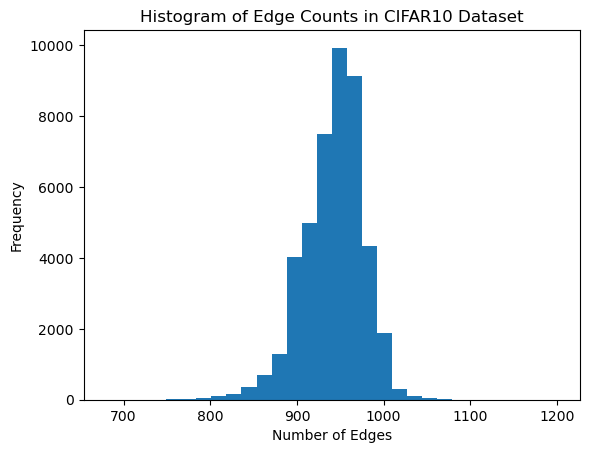

In [6]:
edge_counts = [data.edge_index.size(1) for data in dataset]
plt.hist(edge_counts, bins=30)
plt.title('Histogram of Edge Counts in CIFAR10 Dataset')
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')
plt.savefig('histogram_cifar.png')
plt.show()

In [36]:
import networkx as nx

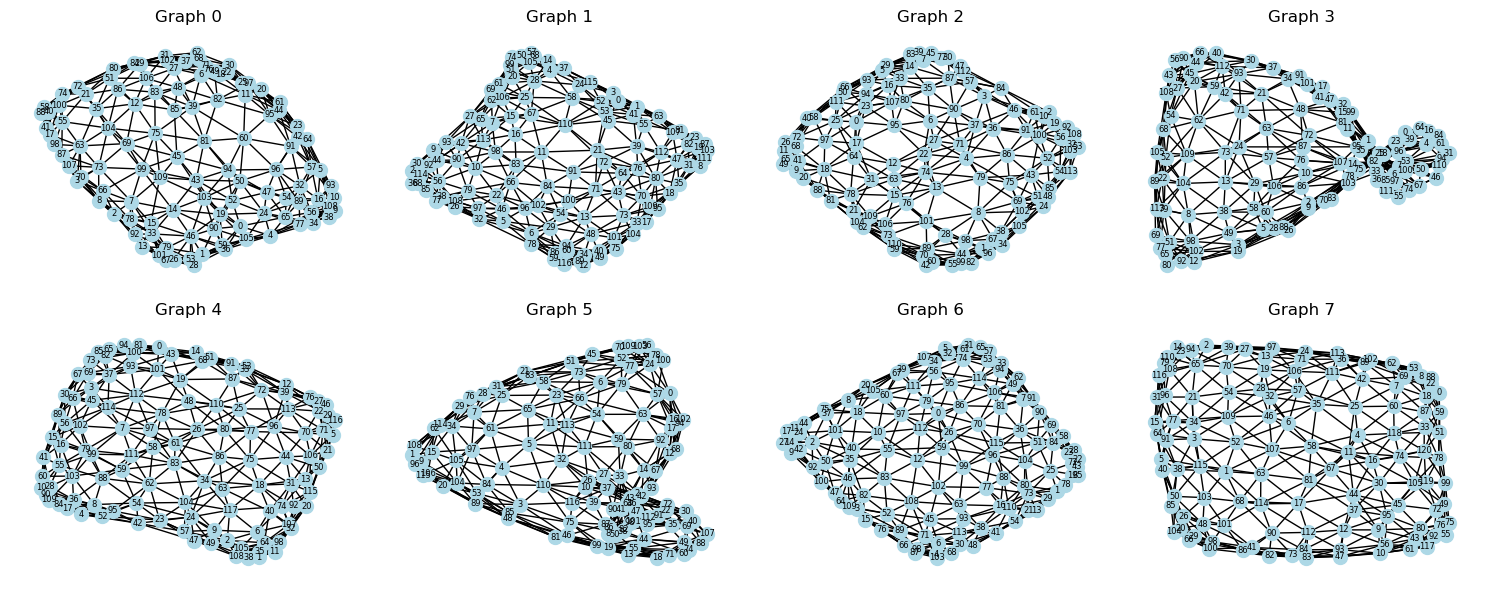

In [117]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.datasets import GNNBenchmarkDataset

# Assuming the dataset is loaded as before
DATA_PATH = '/gpfs/gibbs/pi/gerstein/cz357/23fall/231007_fgcl/cifar10/'
dataset = GNNBenchmarkDataset(DATA_PATH, 'CIFAR10')

# Set up a 2x4 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i in range(8):
    graph = dataset[i]  # Change the index as needed

    # Convert to NetworkX graph
    edge_index = graph.edge_index.numpy()
    num_nodes = graph.num_nodes
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from([(int(edge_index[0, j]), int(edge_index[1, j])) for j in range(edge_index.shape[1])])

    # Draw the graph in the ith subplot
    ax = axes[i]
    nx.draw(G, ax=ax, with_labels=True, node_color='lightblue', node_size=100, font_size=6)
    ax.set_title(f'Graph {i}')

plt.tight_layout()
plt.savefig('real_cifar_2x4.png')  # Save the figure
plt.show()


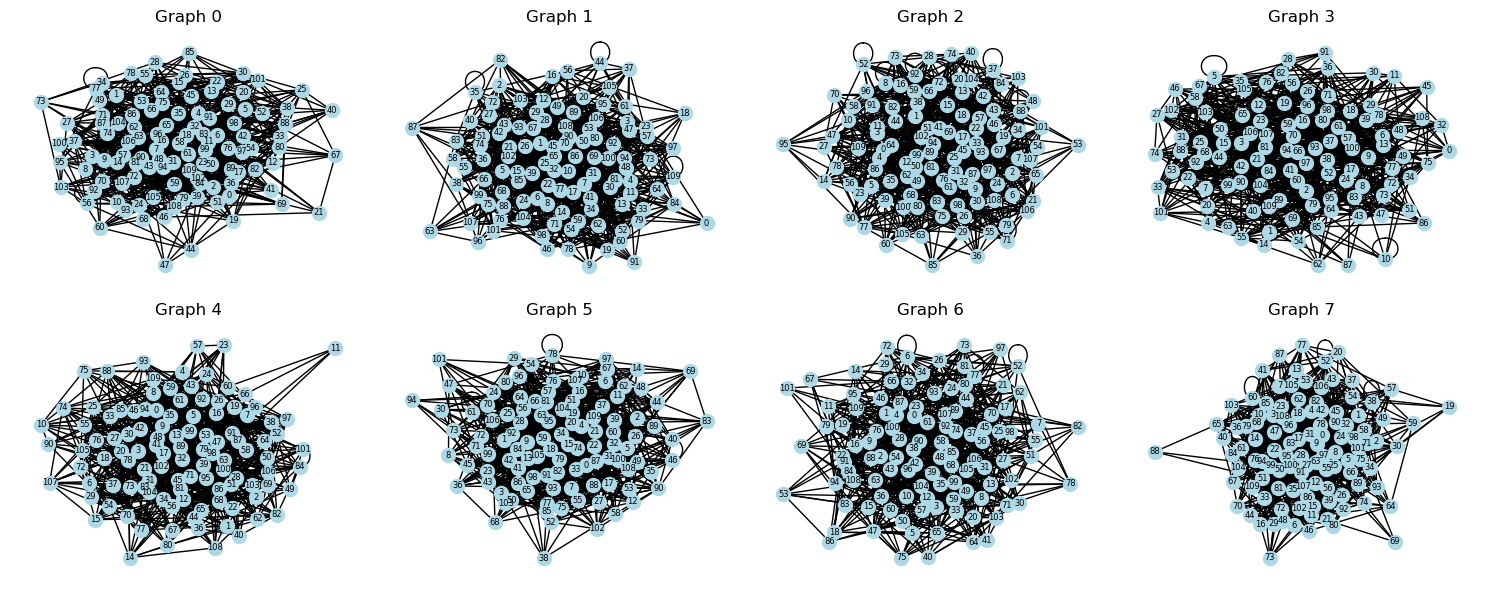

In [118]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.datasets import GNNBenchmarkDataset

# Assuming the dataset is loaded as before
DATA_PATH = '/gpfs/gibbs/pi/gerstein/cz357/23fall/231007_fgcl/cifar10/'
dataset = GNNBenchmarkDataset(DATA_PATH, 'CIFAR10')

# Set up a 2x4 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i in range(8):
    graph = gen_graphs[i]  # Change the index as needed

    # Convert to NetworkX graph
    edge_index = graph.edge_index.numpy()
    num_nodes = graph.num_nodes
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from([(int(edge_index[0, j]), int(edge_index[1, j])) for j in range(edge_index.shape[1])])

    # Draw the graph in the ith subplot
    ax = axes[i]
    nx.draw(G, ax=ax, with_labels=True, node_color='lightblue', node_size=100, font_size=6)
    ax.set_title(f'Graph {i}')

plt.tight_layout()
plt.savefig('fake_cifar_2x4.png')  # Save the figure
plt.show()


In [37]:
dataset[12].y

tensor([2])

In [74]:
dataset[12]

Data(x=[121, 3], edge_index=[2, 968], edge_attr=[968], y=[1], pos=[121, 2])

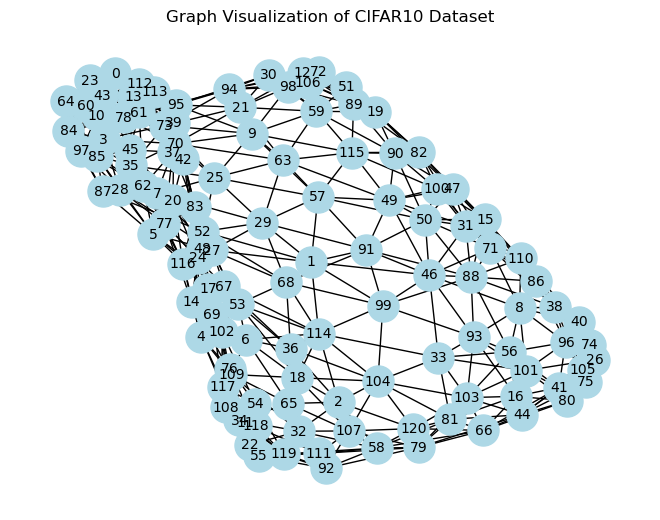

In [100]:
graph = dataset[12]  # or any index you want to visualize

# Convert to NetworkX graph for visualization
edge_index = graph.edge_index.numpy()
num_nodes = graph.num_nodes
G = nx.Graph()

# Add nodes and edges
G.add_nodes_from(range(num_nodes))
G.add_edges_from([(int(edge_index[0, i]), int(edge_index[1, i])) for i in range(edge_index.shape[1])])

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title('Graph Visualization of CIFAR10 Dataset')
plt.savefig('real_cifar.png')
plt.show()

In [66]:
gen_graphs[20].y

tensor([2])

In [75]:
gen_graphs[20]

Data(x=[110, 3], edge_index=[2, 920], y=[1])

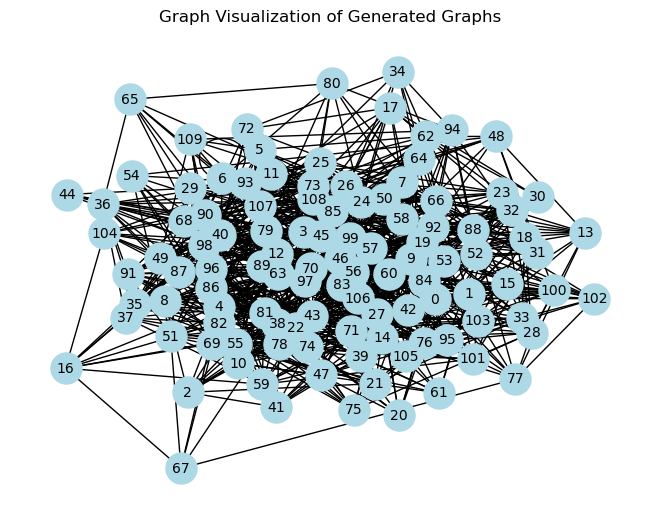

In [111]:
graph = gen_graphs[20]  # or any index you want to visualize

# Convert to NetworkX graph for visualization
edge_index = graph.edge_index.numpy()
num_nodes = graph.num_nodes
G = nx.Graph()

# Add nodes and edges
G.add_nodes_from(range(num_nodes))
G.add_edges_from([(int(edge_index[0, i]), int(edge_index[1, i])) for i in range(edge_index.shape[1])])

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title('Graph Visualization of Generated Graphs')
plt.savefig('fake_cifar.png')
plt.show()

In [25]:
gen_graphs[1].y

tensor([6])

In [33]:
def extract_graph(data, batch_number):
    # Node mask for the selected graph
    node_mask = data.batch == batch_number

    # Extract node features
    x = data.x[node_mask]

    # Find the node indices in the batch
    node_indices = node_mask.nonzero(as_tuple=False).view(-1)

    # Create a mask for edges where both nodes belong to the selected graph
    edge_mask = node_mask[data.edge_index[0]] & node_mask[data.edge_index[1]]

    # Extract and adjust the edge index
    edge_index = data.edge_index[:, edge_mask] - node_indices.min()

    return Data(x=x, edge_index=edge_index)

# Assuming 'data' is your batched Data object
graph_number = 0  # The graph you want to extract
extracted_graph = extract_graph(generated_graphs, graph_number)

print(extracted_graph)


Data(x=[110, 3], edge_index=[2, 966])


In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Batch

def visualize_graph(edge_index, title="Graph"):
    G = nx.Graph()
    G.add_edges_from(edge_index.t().tolist())  # Convert to list of edge pairs
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)
    plt.title(title)
    plt.show()

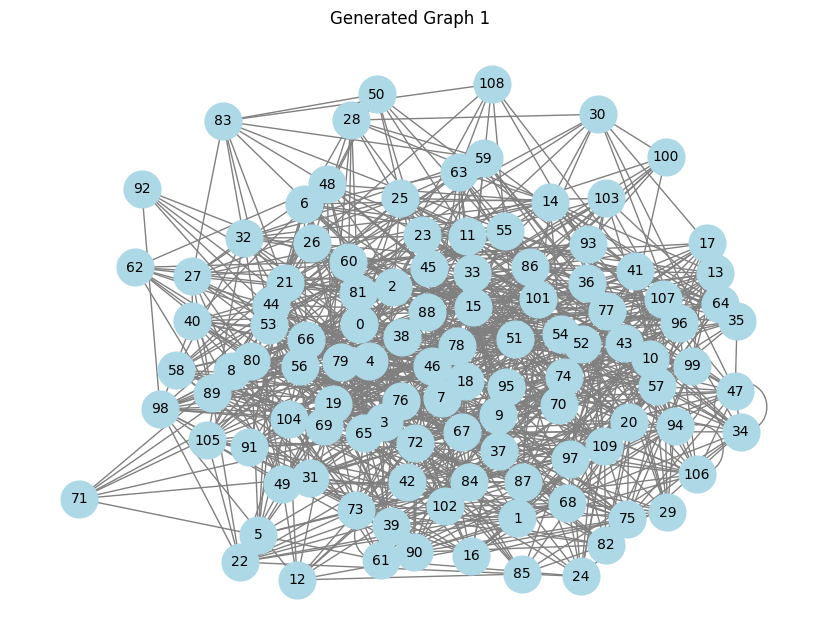

In [36]:
visualize_graph(extracted_graph.edge_index, title=f"Generated Graph {i+1}")

In [ ]:
for i, data in enumerate(batch.to_data_list()):
    visualize_graph(data.edge_index, title=f"Generated Graph {i+1}")
    break

In [24]:
batch.to_data_list()

[Data(x=[550, 3], edge_index=[2, 4646], batch=[550])]

In [26]:
for i, data in enumerate(batch.to_data_list()):
    print(data.x.size())
    break

torch.Size([550, 3])
